In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
glass=pd.read_csv('https://gist.github.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv')
glass.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# DATA PREPROCESSING

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [10]:
glass.drop('Id number' ,axis=1,inplace=True)

In [11]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [104]:
#observations
#data is skewed
#outliers are present
#scaling is also required

# SKEWNESS DETECTION

In [12]:
skewRI=glass.RI.skew(axis=0, skipna=True)
print('RI skewness:',skewRI)
skewNa=glass.Na.skew(axis=0,skipna=True)
print('Na skewness:',skewNa)
skewMg=glass.Mg.skew(axis=0,skipna=True)
print('Mg skewness:',skewMg)
skewAl=glass.Al.skew(axis=0,skipna=True)
print('Al skewness:',skewAl)
skewSi=glass.Si.skew(axis=0,skipna=True)
print('Si skewness:',skewSi)
skewK=glass.K.skew(axis=0,skipna=True)
print('K skewness:',skewK)
skewCa=glass.Ca.skew(axis=0,skipna=True)
print('Ca skewness:',skewCa)
skewBa=glass.Ba.skew(axis=0,skipna=True)
print('Ba skewness:',skewBa)
skewFe=glass.Fe.skew(axis=0,skipna=True)
print('Fe skewness:',skewFe)

RI skewness: 1.6254305060087644
Na skewness: 0.4541814536577495
Mg skewness: -1.1525593175802356
Al skewness: 0.9072898090246346
Si skewness: -0.7304472251318588
K skewness: 6.55164830960496
Ca skewness: 2.0470539131183103
Ba skewness: 3.4164245693025577
Fe skewness: 1.754327470435831


<AxesSubplot:xlabel='RI', ylabel='Density'>

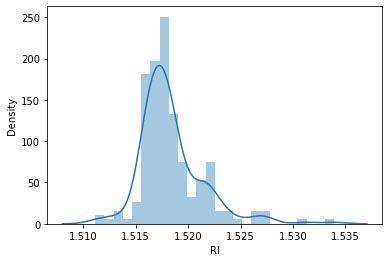

In [13]:
sns.distplot(glass['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

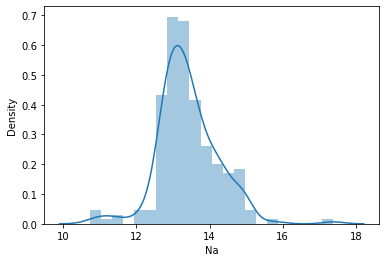

In [14]:
sns.distplot(glass['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

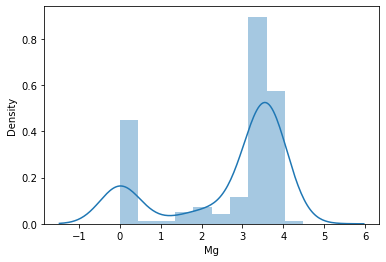

In [15]:
sns.distplot(glass['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

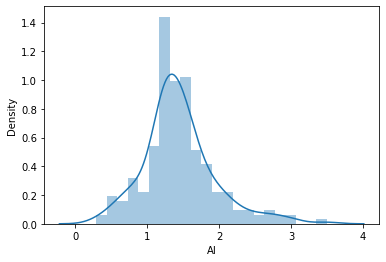

In [16]:
sns.distplot(glass['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

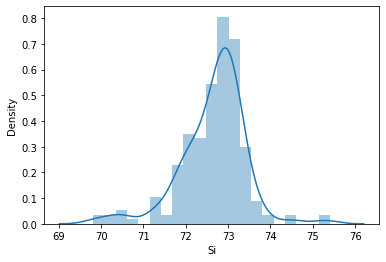

In [17]:
sns.distplot(glass['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

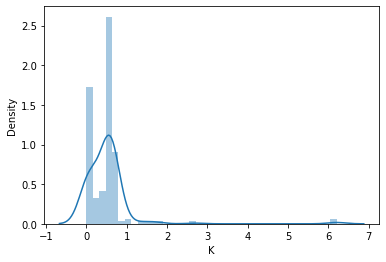

In [18]:
sns.distplot(glass['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

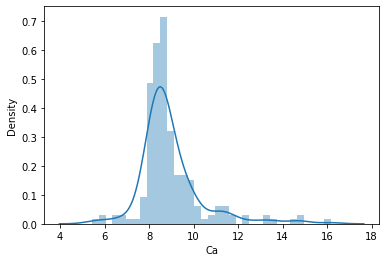

In [19]:
sns.distplot(glass['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

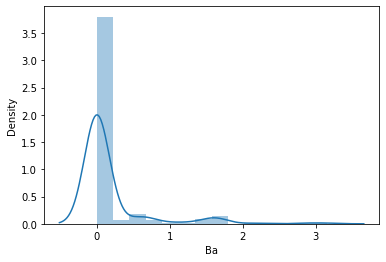

In [20]:
sns.distplot(glass['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

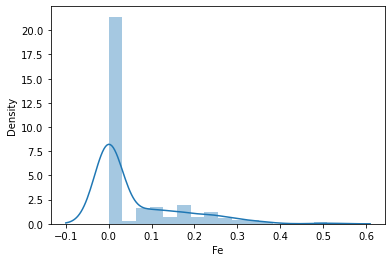

In [21]:
sns.distplot(glass['Fe'])

In [22]:
glass['K']=np.sqrt(glass['K'])
glass['Ca']=np.log(glass['Ca'])
glass['Ba']=np.sqrt(glass['Ba'])

In [23]:
skewK_=glass.K.skew(axis=0, skipna=True)
skewCa_=glass.Ca.skew(axis=0, skipna=True)
skewBa_=glass.Ba.skew(axis=0, skipna=True)
print('K skewness:',skewK_)
print('Ca skewness:',skewCa_)
print('Ba skewness:',skewBa_)

K skewness: 0.8712212293847084
Ca skewness: 1.0663634752110298
Ba skewness: 2.3772007341092225


<AxesSubplot:xlabel='K', ylabel='Density'>

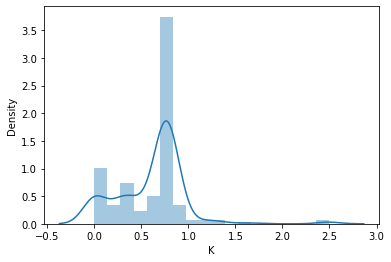

In [24]:
sns.distplot(glass['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

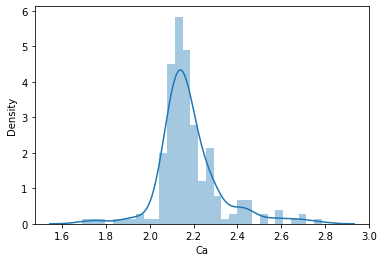

In [25]:
sns.distplot(glass['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

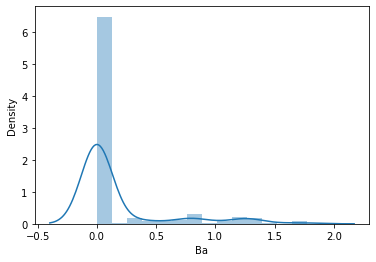

In [26]:
sns.distplot(glass['Ba'])

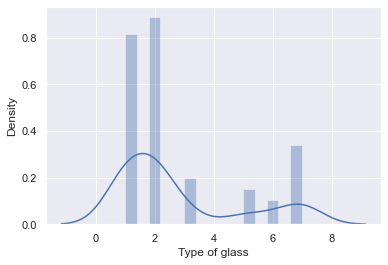

In [28]:
sns.set()
sns.distplot(glass['Type of glass'],bins=15)
plt.show()

In [29]:
glass['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

# BASIC VISUALIZATION

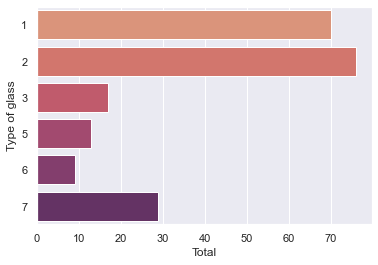

In [30]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Type of glass",data=glass,palette="flare")
plt.ylabel('Type of glass')
plt.xlabel('Total')
plt.show()

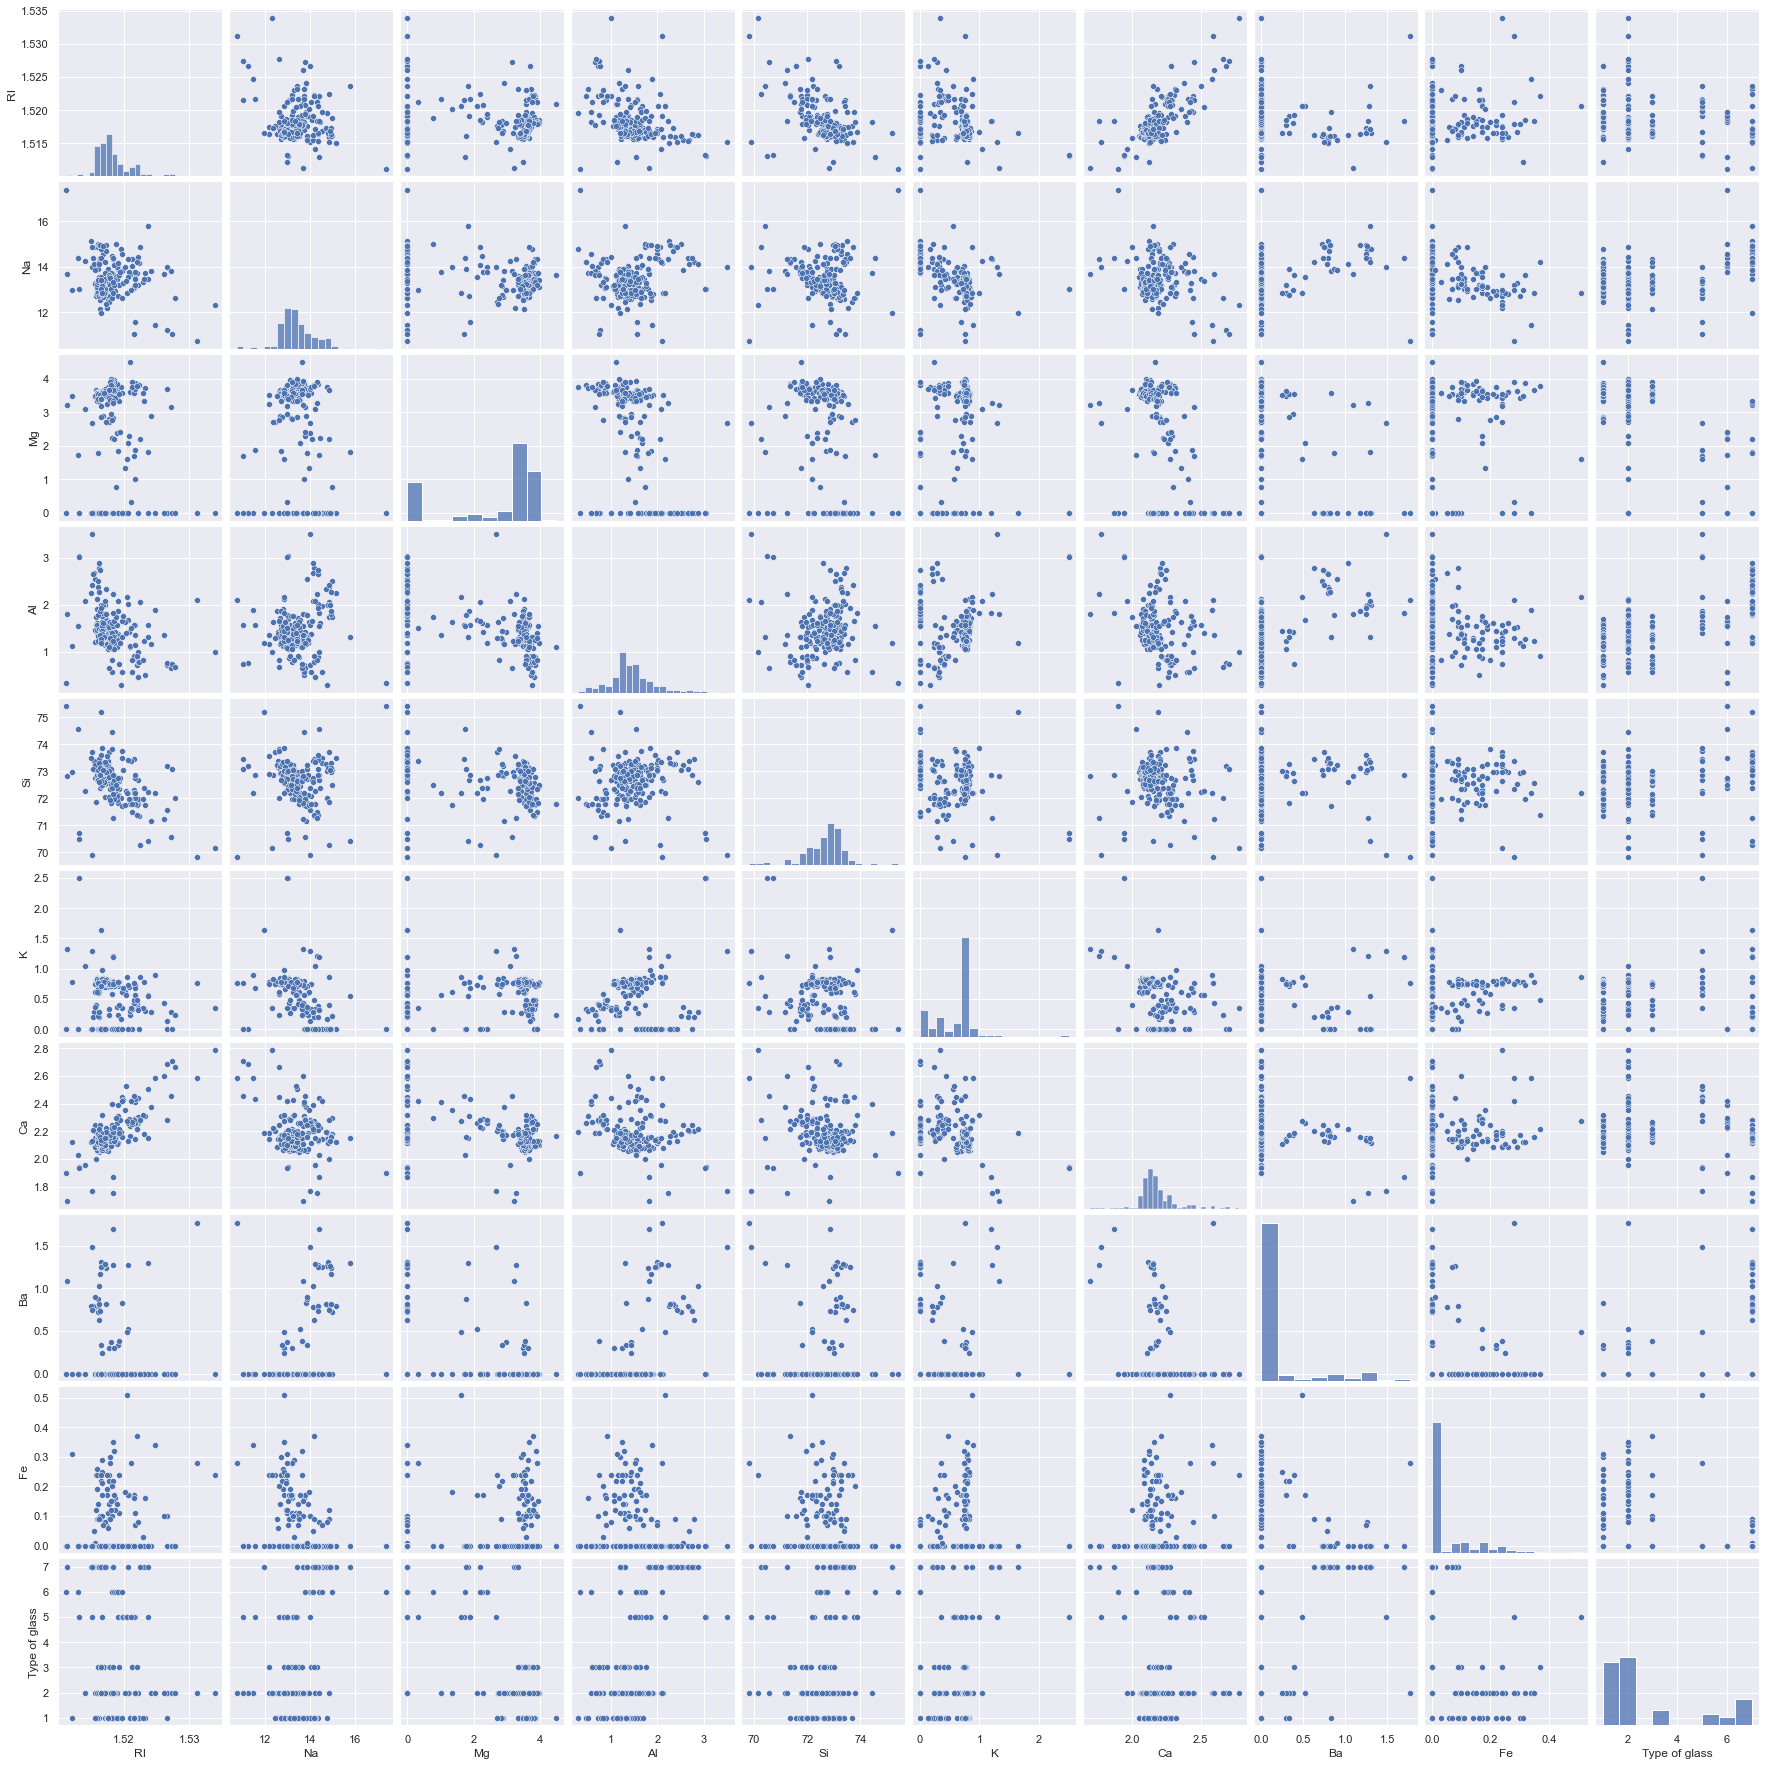

In [31]:
sns.pairplot(glass)

# OUTLIER DETECTION

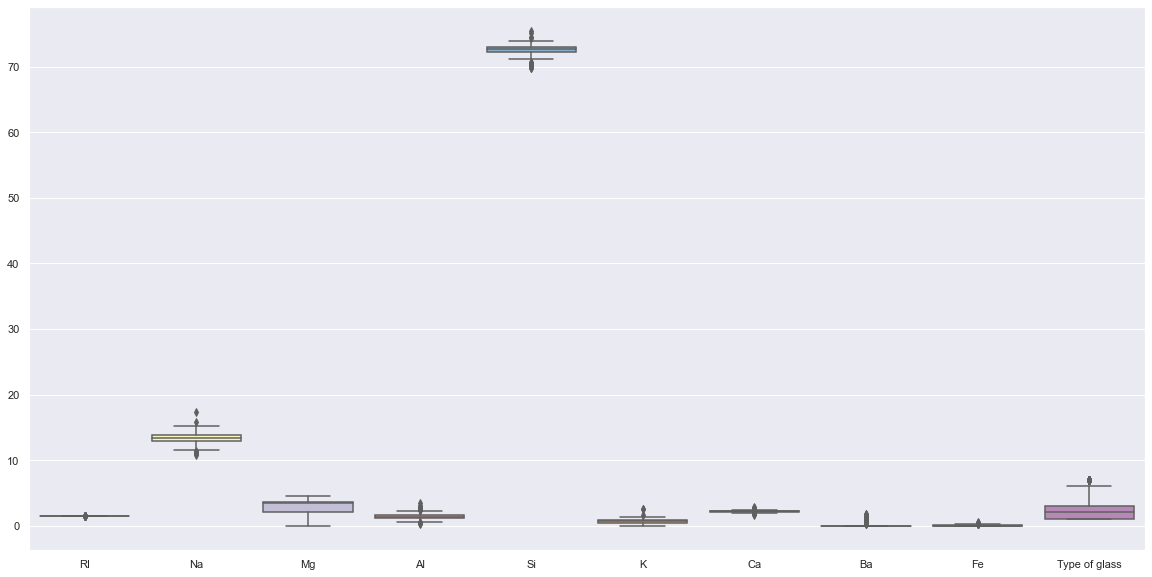

In [32]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=glass,palette="Set3")
plt.show()

<AxesSubplot:>

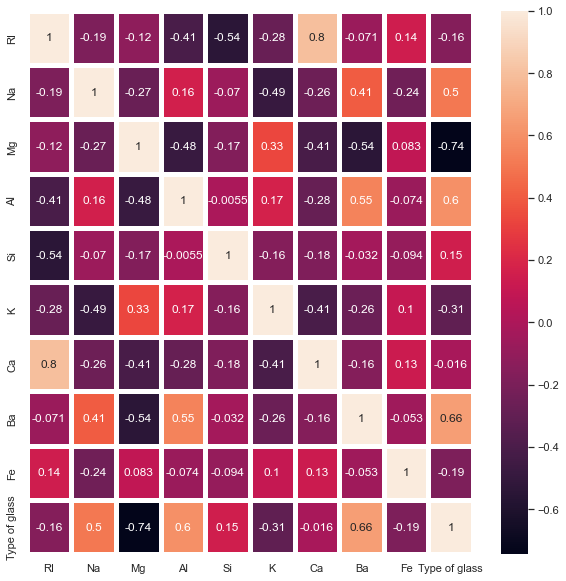

In [34]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(glass.corr(),ax=ax,annot=True,linewidths=5)

# SCALING THE INDEPENDENT VARIABLES

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(glass.drop('Type of glass',axis=1))
scaled_features=scaler.transform(glass.drop('Type of glass',axis=1))

In [37]:
df_feat=pd.DataFrame(scaled_features,columns=glass.columns[:-1])
df_feat

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.992606,-0.086615,-0.417679,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,0.243070,-0.859448,-0.417679,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,0.054574,-0.904014,-0.417679,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.414578,-0.521297,-0.417679,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.377708,-0.649417,-0.417679,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.888057,0.247124,2.249144,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-1.668419,-0.370604,2.848499,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-1.668419,-0.337555,2.899457,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-1.668419,-0.304662,2.827892,-0.586451


In [38]:
#divide the variables into x and y
x=df_feat
y=glass['Type of glass'].values

In [39]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [41]:
#importing SMOTE
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

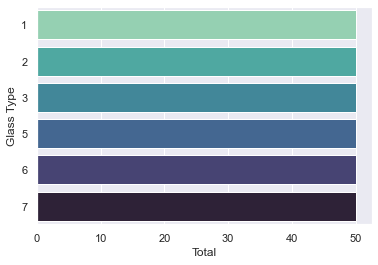

In [42]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,data=glass,palette="mako_r")
plt.ylabel('Glass Type')
plt.xlabel('Total')
plt.show()

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_)

[0.13158027 0.08857409 0.17066484 0.13511617 0.08595858 0.11048651
 0.12955379 0.09283276 0.05523299]


# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred_lr_train=lr.predict(x_train)
y_pred_lr_test=lr.predict(x_test)

In [47]:
print(lr.coef_)
print('*****')
print(lr.intercept_)

[[ 0.48518129 -0.49851784  1.83173409 -2.13715697  0.30622619  0.97377719
   0.02026416 -0.78213144  0.36558636]
 [ 0.78408722 -0.75541685 -0.69299644 -0.34710546 -0.361459    0.0645434
  -1.39851021 -0.35117154  0.43241564]
 [-2.44052816 -0.44092075  1.4605687  -1.17851774 -1.50888255 -0.76613695
   1.02710319  0.47228393  0.52688763]
 [-0.3976344  -1.02668879 -1.21288555  1.96005957 -0.10077689  0.99504853
   1.02626732  0.22375625  0.04676586]
 [-0.1893056   1.42102477 -0.43083742  0.73066286  0.19463784 -2.1975352
   0.10624138 -1.25901187 -0.55484335]
 [ 1.75819966  1.30051947 -0.95558338  0.97205773  1.47025441  0.93030304
  -0.78136583  1.69627466 -0.81681213]]
*****
[ 0.14851806  1.98081505  0.94040811 -0.93032764 -2.03696417 -0.10244941]


In [48]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_train,y_pred_lr_train))
print('*****')
print(classification_report(y_test,y_pred_lr_test))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75        50
           2       0.68      0.56      0.62        50
           3       0.77      0.94      0.85        50
           5       0.94      0.94      0.94        50
           6       0.98      1.00      0.99        50
           7       0.98      0.94      0.96        50

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

*****
              precision    recall  f1-score   support

           1       0.59      0.62      0.60        21
           2       0.76      0.50      0.60        26
           3       0.31      0.57      0.40         7
           5       0.67      1.00      0.80         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.63        65
   macro avg     

In [49]:
print(confusion_matrix(y_train,y_pred_lr_train))
print('*****')
print(confusion_matrix(y_test,y_pred_lr_test))

[[37  7  6  0  0  0]
 [10 28  8  3  1  0]
 [ 1  2 47  0  0  0]
 [ 0  2  0 47  0  1]
 [ 0  0  0  0 50  0]
 [ 1  2  0  0  0 47]]
*****
[[13  4  4  0  0  0]
 [ 6 13  5  1  1  0]
 [ 3  0  4  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [50]:
print(accuracy_score(y_train,y_pred_lr_train))
print('*****')
print(accuracy_score(y_test,y_pred_lr_test))

0.8533333333333334
*****
0.6307692307692307


In [51]:
from sklearn.model_selection import cross_val_score
accuracy_train_lr=cross_val_score(lr,X=x_train,y=y_train,cv=15)
accuracy_test_lr=cross_val_score(lr,X=x_test,y=y_test,cv=15)
print(accuracy_train_lr)
print('\n')
print(accuracy_test_lr)

[0.8  0.55 0.85 0.75 0.85 0.8  0.85 0.85 0.85 0.8  0.8  0.75 1.   0.85
 0.95]


[0.8  0.6  0.6  0.2  0.4  0.75 1.   0.25 0.75 0.5  0.25 0.5  0.25 0.5
 0.25]


In [52]:
print(accuracy_train_lr.mean())
print('*****')
print(accuracy_test_lr.mean())

0.82
*****
0.5066666666666666


# DECISION TREE CLASSIFIER

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(x_train,y_train)
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [54]:
y_pred_dt_gini_train=dt_gini.predict(x_train)
y_pred_dt_gini_test=dt_gini.predict(x_test)

In [55]:
y_pred_dt_entropy_train=dt_entropy.predict(x_train)
y_pred_dt_entropy_test=dt_entropy.predict(x_test)

In [56]:
print(confusion_matrix(y_test,y_pred_dt_gini_test))
print('\n')
print(confusion_matrix(y_test,y_pred_dt_entropy_test))

[[15  4  1  1  0  0]
 [ 7 15  2  0  2  0]
 [ 2  1  4  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  1  0  6]]


[[15  5  0  0  0  1]
 [ 4 16  4  0  2  0]
 [ 5  1  0  0  0  1]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [57]:
print(classification_report(y_test,y_pred_dt_gini_test))
print('\n')
print(classification_report(y_test,y_pred_dt_entropy_test))

              precision    recall  f1-score   support

           1       0.62      0.71      0.67        21
           2       0.75      0.58      0.65        26
           3       0.57      0.57      0.57         7
           5       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         2
           7       1.00      0.86      0.92         7

    accuracy                           0.68        65
   macro avg       0.66      0.79      0.69        65
weighted avg       0.70      0.68      0.68        65



              precision    recall  f1-score   support

           1       0.62      0.71      0.67        21
           2       0.73      0.62      0.67        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       0.78      1.00      0.88         7

    accuracy                           0.65        65
   macro avg       0.

In [58]:
print(accuracy_score(y_train,y_pred_dt_gini_train))
print('\n')
print(accuracy_score(y_test,y_pred_dt_gini_test))

1.0


0.676923076923077


In [59]:
print(accuracy_score(y_train,y_pred_dt_entropy_train))
print('\n')
print(accuracy_score(y_test,y_pred_dt_entropy_test))

1.0


0.6461538461538462


In [60]:
accuracy_train_dt_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_dt_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_dt_gini)
print('\n')
print(accuracy_test_dt_gini)

[0.7  0.65 0.9  0.9  0.8  0.9  0.9  0.85 0.9  0.8  0.85 0.9  0.9  0.8
 1.  ]


[0.8  0.8  0.4  0.2  0.6  0.75 0.75 0.25 0.75 0.75 0.25 0.5  0.75 0.5
 0.75]


In [61]:
print(accuracy_train_dt_gini.mean())
print('*****')
print(accuracy_test_dt_gini.mean())

0.8500000000000001
*****
0.5866666666666667


In [62]:
accuracy_train_dt_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_dt_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_dt_entropy)
print('\n')
print(accuracy_test_dt_entropy)

[0.8  0.7  0.9  0.8  0.8  0.85 0.85 0.9  0.85 0.8  0.75 0.9  0.95 0.85
 1.  ]


[0.8  0.6  0.6  0.4  0.4  0.5  0.75 0.25 0.75 0.5  0.5  0.25 1.   0.25
 0.75]


In [63]:
print(accuracy_train_dt_entropy.mean())
print('*****')
print(accuracy_test_dt_entropy.mean())

0.8466666666666666
*****
0.5533333333333333


# RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

In [66]:
print(confusion_matrix(y_train,y_pred_rf_train))
print('\n')
print(confusion_matrix(y_test,y_pred_rf_test))

[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0  0 50]]


[[17  2  2  0  0  0]
 [ 8 18  0  0  0  0]
 [ 4  0  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [67]:
print(classification_report(y_train,y_pred_rf_train))
print('\n')
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



              precision    recall  f1-score   support

           1       0.59      0.81      0.68        21
           2       0.90      0.69      0.78        26
           3       0.60      0.43      0.50         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.75        65
   macro avg       0.

In [68]:
print(accuracy_score(y_train,y_pred_rf_train))
print('\n')
print(accuracy_score(y_test,y_pred_rf_test))

1.0


0.7538461538461538


# KNN CLASSIFIER

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [71]:
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

In [72]:
print(confusion_matrix(y_train,y_pred_knn_train))
print('\n')
print(confusion_matrix(y_test,y_pred_knn_test))

[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0  0 50]]


[[17  2  2  0  0  0]
 [ 5 18  2  0  1  0]
 [ 3  2  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [73]:
print(classification_report(y_train,y_pred_knn_train))
print('\n')
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



              precision    recall  f1-score   support

           1       0.68      0.81      0.74        21
           2       0.82      0.69      0.75        26
           3       0.33      0.29      0.31         7
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.74        65
   macro avg       0.

In [74]:
print(accuracy_score(y_train,y_pred_knn_train))
print('\n')
print(accuracy_score(y_test,y_pred_knn_test))

1.0


0.7384615384615385


In [76]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [77]:
error_rate

[0.26153846153846155,
 0.27692307692307694,
 0.3076923076923077,
 0.2923076923076923,
 0.2923076923076923,
 0.2923076923076923,
 0.36923076923076925,
 0.3384615384615385,
 0.3384615384615385,
 0.3076923076923077,
 0.3076923076923077,
 0.3230769230769231,
 0.35384615384615387,
 0.35384615384615387,
 0.3384615384615385,
 0.3384615384615385,
 0.3384615384615385,
 0.36923076923076925,
 0.36923076923076925,
 0.38461538461538464,
 0.4,
 0.4,
 0.4153846153846154,
 0.4153846153846154,
 0.46153846153846156,
 0.46153846153846156,
 0.4461538461538462,
 0.47692307692307695,
 0.47692307692307695,
 0.47692307692307695,
 0.5076923076923077,
 0.5076923076923077,
 0.5076923076923077,
 0.49230769230769234,
 0.47692307692307695,
 0.5538461538461539,
 0.5384615384615384,
 0.5384615384615384,
 0.5230769230769231]

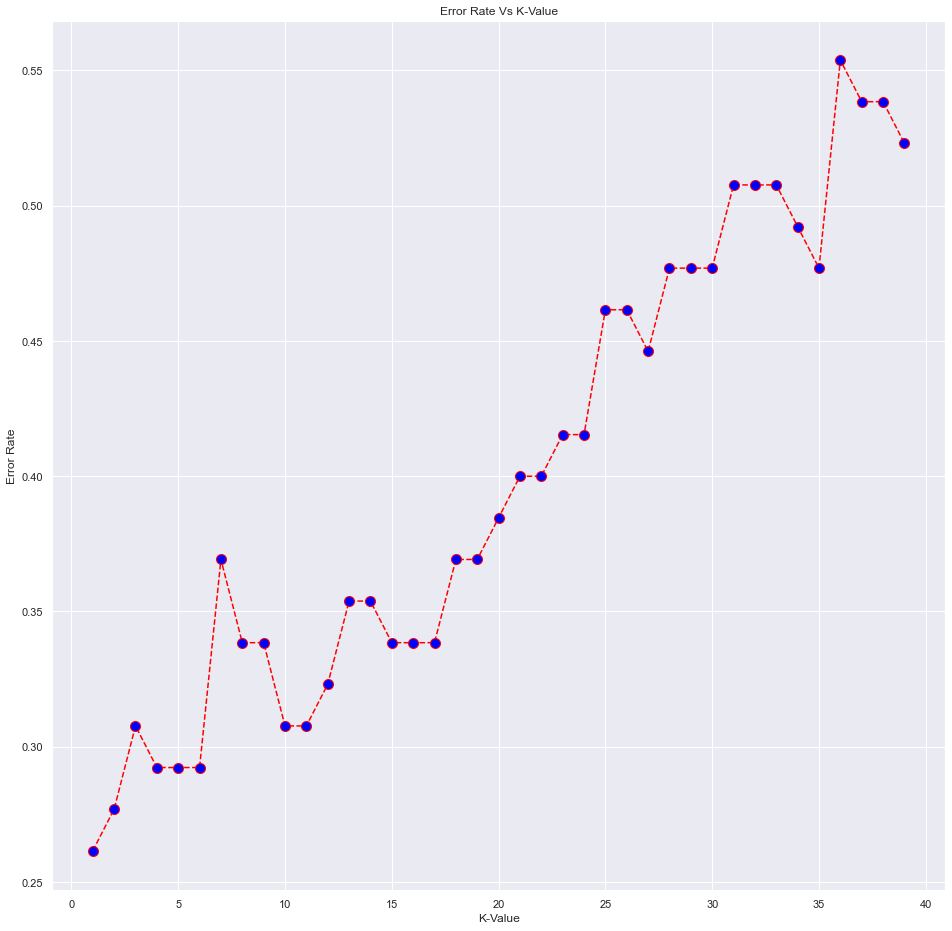

In [78]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate Vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

In [79]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [80]:
y_pred_knn_test=knn.predict(x_test)

In [81]:
print(accuracy_score(y_test,y_pred_knn_test))

0.7230769230769231


# SVM CLASSIFIER

In [82]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)
svc_sigmoid=SVC(kernel='sigmoid')
svc_sigmoid.fit(x_train,y_train)
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)

SVC()

In [83]:
y_pred_sigmoid=svc_sigmoid.predict(x_test)
y_pred_linear=svc_linear.predict(x_test)
y_pred_poly=svc_poly.predict(x_test)
y_pred_rbf=svc_rbf.predict(x_test)

In [84]:
print(confusion_matrix(y_test,y_pred_sigmoid))
print('\n')
print(confusion_matrix(y_test,y_pred_linear))
print('\n')
print(confusion_matrix(y_test,y_pred_poly))
print('\n')
print(confusion_matrix(y_test,y_pred_rbf))

[[10  5  6  0  0  0]
 [ 9  5  6  4  2  0]
 [ 3  2  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  1  0  6]]


[[13  4  4  0  0  0]
 [ 5 13  7  1  0  0]
 [ 2  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


[[ 2  0 19  0  0  0]
 [ 2  3 21  0  0  0]
 [ 1  0  6  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


[[16  3  1  0  0  1]
 [ 7 18  0  0  1  0]
 [ 3  1  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [85]:
print(classification_report(y_test,y_pred_sigmoid))
print('\n')
print(classification_report(y_test,y_pred_linear))
print('\n')
print(classification_report(y_test,y_pred_poly))
print('\n')
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           1       0.45      0.48      0.47        21
           2       0.38      0.19      0.26        26
           3       0.14      0.29      0.19         7
           5       0.29      1.00      0.44         2
           6       0.33      0.50      0.40         2
           7       1.00      0.86      0.92         7

    accuracy                           0.40        65
   macro avg       0.43      0.55      0.45        65
weighted avg       0.44      0.40      0.40        65



              precision    recall  f1-score   support

           1       0.65      0.62      0.63        21
           2       0.76      0.50      0.60        26
           3       0.31      0.71      0.43         7
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.65        65
   macro avg       0.

In [86]:
print(round(accuracy_score(y_test,y_pred_sigmoid),2))
print('\n')
print(round(accuracy_score(y_test,y_pred_linear),2))
print('\n')
print(accuracy_score(y_test,y_pred_poly))
print('\n')
print(accuracy_score(y_test,y_pred_rbf))

0.4


0.65


0.3384615384615385


0.7384615384615385


# GAUSSIAN NAIVE-BAYES

In [87]:
from sklearn.naive_bayes import GaussianNB
NBclassifier=GaussianNB()
NBclassifier.fit(x_train,y_train)
y_pred_NB=NBclassifier.predict(x_test)
print(classification_report(y_test,y_pred_NB))
print(confusion_matrix(y_test,y_pred_NB))
from sklearn.metrics import accuracy_score
NBAcc1=accuracy_score(y_pred_NB,y_test)
print('Naive Bayes accuracy is:{:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           1       0.43      0.62      0.51        21
           2       0.75      0.12      0.20        26
           3       0.31      0.71      0.43         7
           5       0.50      1.00      0.67         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.49        65
   macro avg       0.59      0.74      0.59        65
weighted avg       0.60      0.49      0.44        65

[[13  1  5  0  1  1]
 [15  3  6  2  0  0]
 [ 2  0  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
Naive Bayes accuracy is:49.23%


# HYPER-PARAMETER TUNING

In [90]:
model_params={
      "svm":{
          "model":SVC(gamma="auto"),
          "params":{
              'C':[1,10,20],
              'kernel':["rbf"]
              
          }
      },
        "decision_tree":{
            "model":DecisionTreeClassifier(),
            "params":{
                'criterion':["entropy","gini"],
                "max_depth":[5,8,9]
                
            }
        },
         "random_forest":{
             "model":RandomForestClassifier(),
             "params":{
                 "n_estimators":[1,5,10],
                 "max_depth":[5,8,9]
             }
         },
          'logistic_regression':{
              'model':LogisticRegression(solver='liblinear',multi_class='auto'),
              'params':{
                  "C":[1,5,10]
              }
          }
}

In [91]:
from sklearn.model_selection import GridSearchCV
score=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x,y)
    score.append({
        "Model":model_name,
        "Best_Score":clf.best_score_,
        "Best_Params":clf.best_params_
    })

In [93]:
glass_df=pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
glass_df

,Model,Best_Score,Best_Params
0,svm,0.658832,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.639601,"{'criterion': 'gini', 'max_depth': 8}"
2,random_forest,0.700321,"{'max_depth': 9, 'n_estimators': 10}"
3,logistic_regression,0.621795,{'C': 1}


In [94]:
from sklearn.model_selection import cross_val_score
glass_rf=RandomForestClassifier(max_depth=9,n_estimators=10)
scores=cross_val_score(glass_rf,x,y,cv=8,scoring="accuracy")
scores

array([0.7037037 , 0.81481481, 0.66666667, 0.66666667, 0.74074074,
       0.62962963, 0.65384615, 0.76923077])

In [95]:
scores[1]

0.8148148148148148

predict Type 

In [112]:
glass={'Rl':1.52,'Na':13.64,'Mg':4.49,'Al':1.10,'Si':71.78,'K':0.24,'Ca':2.16,'Ba':0.0,'Fe':0.0}
df=pd.DataFrame(glass,index=[0])
df

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52,13.64,4.49,1.1,71.78,0.24,2.16,0.0,0.0


In [113]:
new_pred=rf.predict(df)
print(new_pred)

[1]


Save Model using Joblib

In [120]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [121]:
import joblib

In [122]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [123]:
model=joblib.load('model_joblib_rf')

In [125]:
model.predict(df)

array([2], dtype=int64)